# Housing Datasets:

## Gov DataSets: (Free to Use)

The United States Census Bureau Offers very specific data on real estate:
Example (2021 New York City Housing and Vancancy Survey Micro Data):
[Link to example](https://www.census.gov/data/datasets/2021/demo/nychvs/microdata.html)


More Government Housing DataSets:
[Link to Data](https://www.census.gov/topics/housing/data/datasets.html)

## Zillow DataSets: (Free to Use/Download CSV Files)

[Link to zillow dataset](https://www.zillow.com/research/data/)

**Home Values**: Zillow Home Value INdex (ZHVI)
1. Typical home values in different percentiles
2. Availble for 
    - single gamily residences
    - condo/co op homes
    - homes with 1,2,3,4, and 5+ bedrooms

**Home Vlaue Forecasts:** Zillow Home Value Forecast (ZHVF)
1. Month ahead, quarter-ahead, and year ahead forecasts
2. For all homes (SFR, Confo, Co-op)
3. Metro and US

**Rentals**: Zillow Observed Rent Index (ZORI)
1. Market rate rents
2. Categories
   - all homes
   - single family
   - multi family
3. Metro and US

**Rental Forecast**: Zillow Observed Rent Forecast (ZORF)
1. Forecast of ZORI for a month, quarter, and year ahead
2. U.S

**For Sale Listings**: 
1. For sale inventory (count of active listings each month)
2. New listings (every month)
3. Newly pending listings (listings pending status)
4. Median list price
5. Metro US

**Sales**: 
1. Sales Count nowcast
2. Sale price (median & mean)
3. Total transaction value
4. Sale to list ratio (sale price vs list price)
5. Metro/US

**Market Heat Index**:
1. Supply demand in a market
2. Single family + condo homes
3. Metro / US

**New Construction**: 
1. Number of sold new Constrcution Homes
2. New construction median sale price
3. Median slate price per sqft
4. Metro/US

## Zillow API: (via Bridge Interactive and MLS Integrations)

- API is part of Zillow’s developer platform and allows access to more granular data, such as property-level details and comprehensive real estate records.
- Through the Bridge Interactive platform, Zillow connects to Multiple Listing Service (MLS) datasets, which are extensive, property-level databases maintained by real estate professionals.
- This data is much richer and includes information like listings, sales history, taxes, photos, and agent-provided details.
- APIs requires developer accounts, authentication, and sometimes payment for higher usage tiers

## Kaggle Housing DataSets:

Key Words: House Prices USA, Real Estate USA, Housing DataSets USA, Zillow Data 

Links to potentially interesting data sets:
USA Real Estate Dataset (300k+ entries): [Link to resource](https://www.kaggle.com/discussions/general/333339) <br>
**Attributes:**
- status
- price
- bed
- bath
- acre_lot
- full_address
- street
- city
- state
- zip_code
- house_size
- sold_date


In [27]:
import pandas as pd
import os

data_directory = "./Zillow_DataSets"

# File paths in dictionary
csv_files = {
    "For Sale Listings": os.path.join(data_directory, "For_Sale_Listing.csv"),
    "Home Values": os.path.join(data_directory, "Home_Values.csv"),
    "Home Values Forecast": os.path.join(data_directory, "Home_Values_Forecast.csv"),
    "Market Heat Index": os.path.join(data_directory, "Market_Heat_Index.csv"),
    "Rentals": os.path.join(data_directory, "Rentals.csv"),
    "Sales": os.path.join(data_directory, "Sales.csv")
}


def load_and_explore_csv(file_path):
    df = pd.read_csv(file_path)
    return df

def get_annual_stats(data, column_to_analyze):
    # group by year and calculate statistics
    annual_stats = data.groupby('Year')[column_to_analyze].agg(
        mean='mean',
        median='median',
        std='std',
        min='min',
        max='max'
    )
    return annual_stats

# idetify outliers, not sure the function works, but stole it from medium (https://medium.com/@marc.bolle/5-easy-ways-to-detect-outliers-in-python-b07639ba32d5)
def detect_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (data < lower_bound) | (data > upper_bound)



#print(load_and_explore_csv(csv_files["Home Values"]))

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


rental_df = load_and_explore_csv(csv_files["Rentals"])
sales_df = load_and_explore_csv(csv_files["Sales"])
forecast_df = load_and_explore_csv(csv_files["Home Values Forecast"])
for_sale_df = load_and_explore_csv(csv_files["For Sale Listings"])
market_df = load_and_explore_csv(csv_files["Market Heat Index"])
home_values_df = load_and_explore_csv(csv_files["Home Values"])


region_name = 'New York, NY'
region = "New York"

Exploring dataset: Rentals


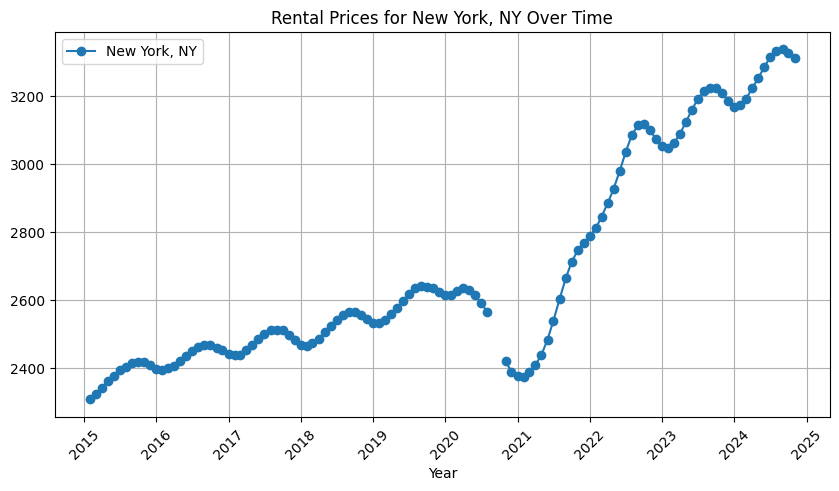

                      1
2015-01-31  2309.053853
2015-02-28  2323.945634
2015-03-31  2342.172815
2015-04-30  2362.866865
2015-05-31  2378.708487
...                 ...
2024-06-30  3315.485733
2024-07-31  3333.168448
2024-08-31  3338.425192
2024-09-30  3327.404340
2024-10-31  3312.654681

[118 rows x 1 columns]


In [62]:
print(f"Exploring dataset: Rentals")

row_data_ny = rental_df[rental_df['RegionName'] == region_name]  # return tuple for ny
rental_data = row_data_ny.drop(columns=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']) # removes irrelevant attributes

# col headers to datetimeindex
rental_data.columns = pd.to_datetime(rental_data.columns)

# plot
plt.figure(figsize=(10, 5))
plt.plot(rental_data.columns, rental_data.iloc[0], marker='o', label=region_name)
plt.title(f"Rental Prices for {region_name} Over Time")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

rental_data = rental_data.T  # transpose data (tuple for date: year and rental price) for NY
print(rental_data)
new_col = 'Rental Price'  # new attribute name
rental_data.columns = [new_col]   # name rental price column
rental_data['Year'] = rental_data.index.year # create new column year and populate for each row


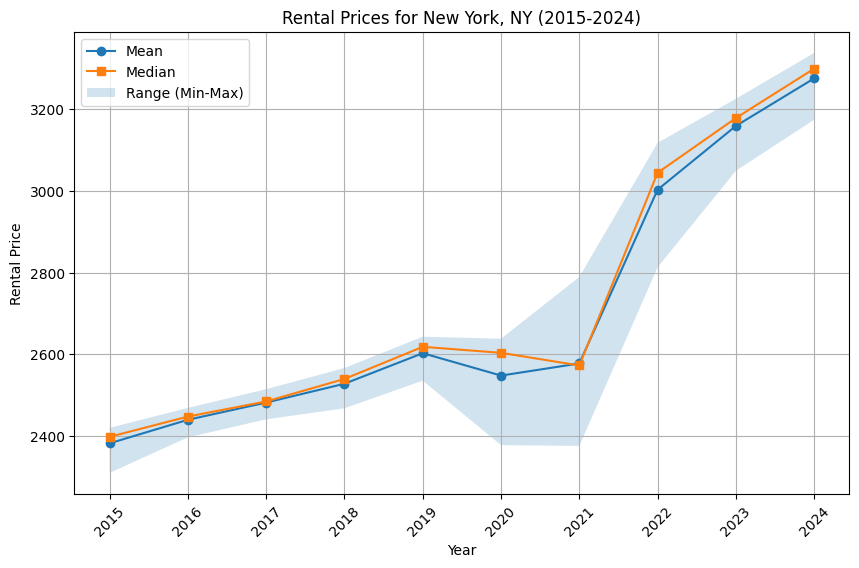

In [37]:
# mean, median, std, min, max
annual_stats = get_annual_stats(rental_data, 'Rental Price')

# return a data table with a boolean value for every year if outlier
outliers = rental_data.groupby('Year')['Rental Price'].apply(detect_outliers)

#print("Outliers (2015-2024):")
#print(outliers)
#print("\nAnnual Statistics (2015-2024):")
#print(annual_stats)

# plot 
plt.figure(figsize=(10, 6))
plt.plot(annual_stats.index, annual_stats['mean'], marker='o', label='Mean')
plt.plot(annual_stats.index, annual_stats['median'], marker='s', label='Median')
plt.fill_between(annual_stats.index, annual_stats['min'], annual_stats['max'], alpha=0.2, label='Range (Min-Max)')
plt.title(f"Rental Prices for {region_name} (2015-2024)")
plt.xlabel("Year")
plt.ylabel("Rental Price")
plt.xticks(annual_stats.index, rotation=45)
plt.legend()
plt.grid(True)
plt.show()


Exploring dataset: Sales


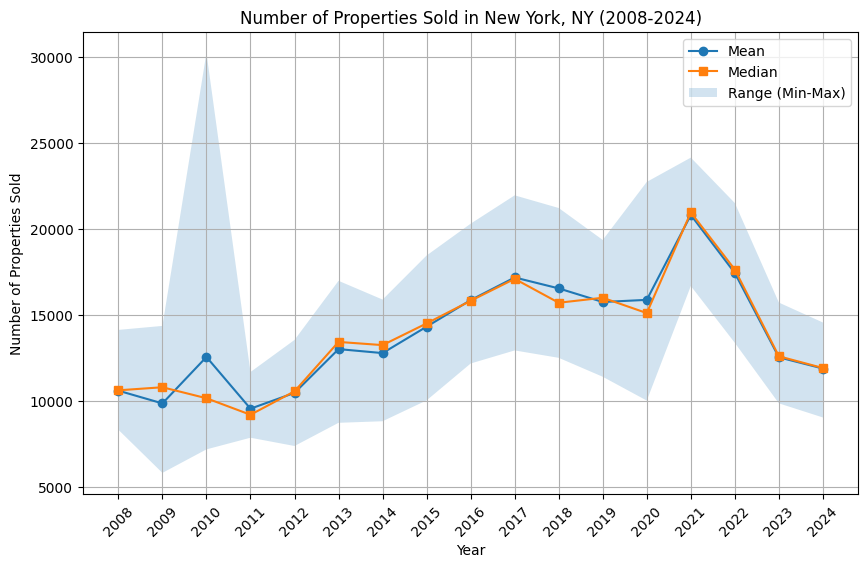

In [38]:
# load sales dataset 
print(f"Exploring dataset: Sales")
sales_data = sales_df[sales_df['RegionName'] == region_name]

# drop
sales_data = sales_data.drop(columns=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'])
sales_data.columns = pd.to_datetime(sales_data.columns) # to data index to reach years, months, days

# transpose, easier to handle
sales_data = sales_data.T
sales_data.columns = ['Number of Properties Sold']
sales_data['Year'] = sales_data.index.year

annual_stats = get_annual_stats(sales_data, 'Number of Properties Sold')
outliers = sales_data.groupby('Year')['Number of Properties Sold'].apply(detect_outliers)

# annual statistics and outliers
# print("Annual Statistics (2008-2024):")
# print(annual_stats)
# print("\nOutliers (2008-2024):")
# print(outliers)

# mean, median, min/max
plt.figure(figsize=(10, 6))
plt.plot(annual_stats.index, annual_stats['mean'], marker='o', label='Mean')
plt.plot(annual_stats.index, annual_stats['median'], marker='s', label='Median')
plt.fill_between(annual_stats.index, annual_stats['min'], annual_stats['max'], alpha=0.2, label='Range (Min-Max)')
plt.title(f"Number of Properties Sold in {region_name} (2008-2024)")
plt.xlabel("Year")
plt.ylabel("Number of Properties Sold")
plt.xticks(annual_stats.index, rotation=45)
plt.legend()
plt.grid(True)
plt.show()


Exploring dataset: Home Values


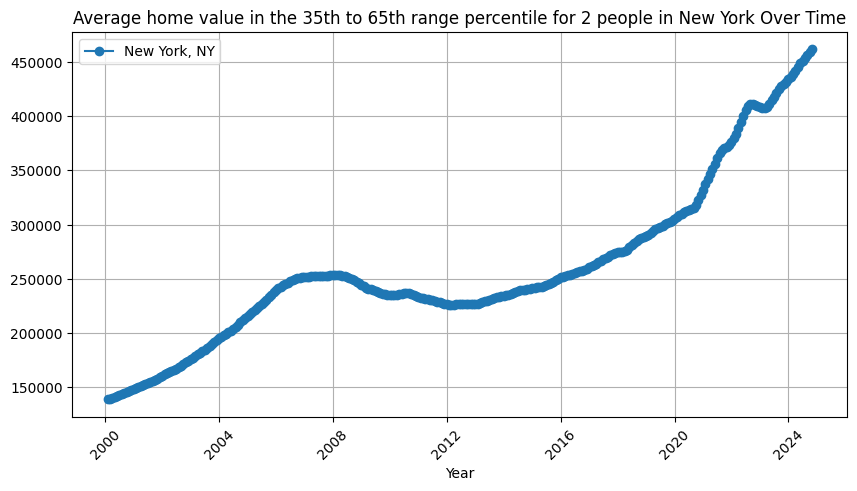

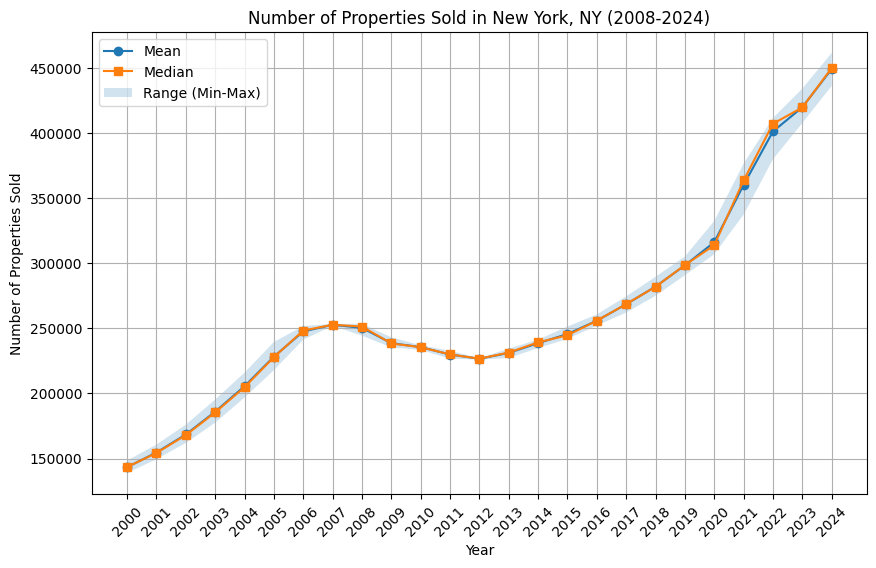

In [44]:
print(f"Exploring dataset: Home Values")
home_values_data = home_values_df[home_values_df['RegionName'] == region]

# drop non-date columns (e.g., 'RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName')
home_values_data = home_values_data.drop(columns=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'])
home_values_data.columns = pd.to_datetime(home_values_data.columns)


plt.figure(figsize=(10, 5))
plt.plot(home_values_data.columns, home_values_data.iloc[0], marker='o', label=region_name)
plt.title(f"Average home value in the 35th to 65th range percentile for 2 people in {region} Over Time")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


# transpose, easier to handle
home_values_data = home_values_data.T
home_values_data.columns = ['Number of Properties Sold']
home_values_data['Year'] = home_values_data.index.year

annual_stats = get_annual_stats(home_values_data, 'Number of Properties Sold')
outliers = sales_data.groupby('Year')['Number of Properties Sold'].apply(detect_outliers)

# annual statistics and outliers
# print("Annual Statistics (2008-2024):")
# print(annual_stats)
# print("\nOutliers (2008-2024):")
# print(outliers)

# mean, median, min/max
plt.figure(figsize=(10, 6))
plt.plot(annual_stats.index, annual_stats['mean'], marker='o', label='Mean')
plt.plot(annual_stats.index, annual_stats['median'], marker='s', label='Median')
plt.fill_between(annual_stats.index, annual_stats['min'], annual_stats['max'], alpha=0.2, label='Range (Min-Max)')
plt.title(f"Number of Properties Sold in {region_name} (2008-2024)")
plt.xlabel("Year")
plt.ylabel("Number of Properties Sold")
plt.xticks(annual_stats.index, rotation=45)
plt.legend()
plt.grid(True)
plt.show()




Exploring dataset: Market Heat Index


<Figure size 1000x600 with 0 Axes>

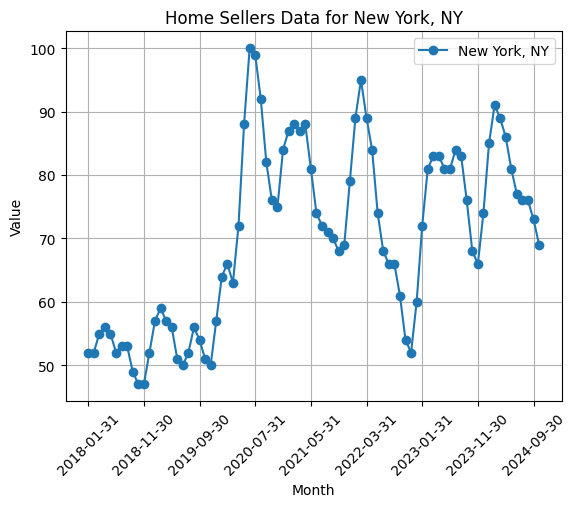

            New York, NY
2018-01-31          52.0
2018-02-28          52.0
2018-03-31          55.0
2018-04-30          56.0
2018-05-31          55.0
...                  ...
2024-06-30          77.0
2024-07-31          76.0
2024-08-31          76.0
2024-09-30          73.0
2024-10-31          69.0

[82 rows x 1 columns]


In [72]:
print(f"Exploring dataset: Market Heat Index")
market_data = market_df[market_df['RegionName'] == region_name]

months = [col for col in market_data.columns if col not in ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']]
market_monthly_data = market_data[months].transpose()  
market_monthly_data.columns = [market_data['RegionName'].iloc[0]]  

# plot data
plt.figure(figsize=(10, 6))
market_monthly_data.plot(kind='line', marker='o')
plt.title('Home Sellers Data for New York, NY')
plt.xlabel('Month')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print(market_monthly_data)


Exploring dataset: For Sale Listings


<Figure size 1000x600 with 0 Axes>

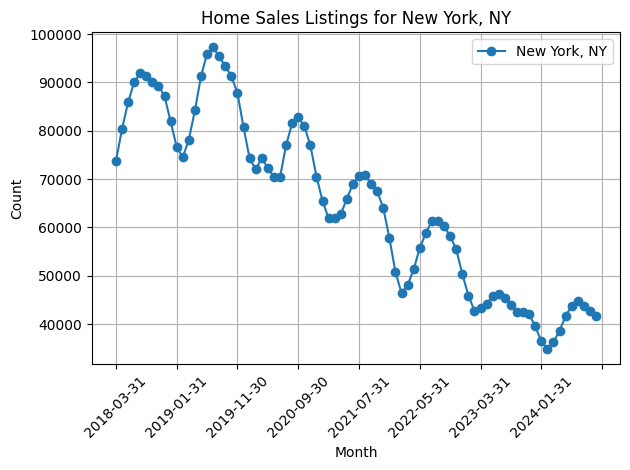

In [47]:
print(f"Exploring dataset: For Sale Listings")
for_sale_df = load_and_explore_csv(csv_files["For Sale Listings"])
regionName = "New York, NY"

region_data = for_sale_df[for_sale_df['RegionName'] == regionName]

# If you want to graph the data across months for a particular region:
months = [col for col in for_sale_df.columns if col not in ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']]
region_monthly_data = region_data[months].transpose()  # transpose for easier plotting
region_monthly_data.columns = [region_data['RegionName'].iloc[0]]  # associate first val of the region name as col header

# Plotting the data as a line graph
plt.figure(figsize=(10, 6))
region_monthly_data.plot(kind='line', marker='o')
plt.title('Home Sales Listings for New York, NY')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Loading data from: ./Zillow_DataSets/Home_Values_Forecast.csv

Attributes (Columns):
['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'BaseDate', '2024-11-30', '2025-01-31', '2025-10-31']

First 5 Rows:
   RegionID  SizeRank       RegionName RegionType StateName    BaseDate  \
0    102001         0    United States    country       NaN  2024-10-31   
1    394913         1     New York, NY        msa        NY  2024-10-31   
2    753899         2  Los Angeles, CA        msa        CA  2024-10-31   
3    394463         3      Chicago, IL        msa        IL  2024-10-31   
4    394514         4       Dallas, TX        msa        TX  2024-10-31   

   2024-11-30  2025-01-31  2025-10-31  
0         0.2         0.6         2.9  
1         0.3         0.5         1.5  
2         0.2         0.4         2.3  
3         0.1         0.2         1.1  
4        -0.2        -0.7         1.2  


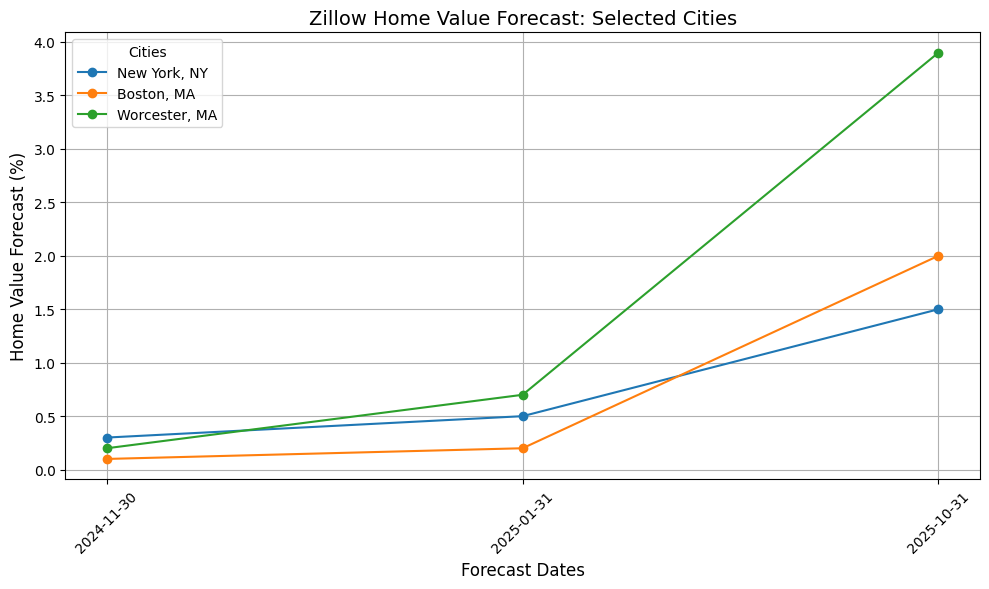

In [ ]:
# Assuming the forecast DataFrame is already loaded
forecast = load_and_explore_csv(csv_files["Home Values Forecast"])

# data for the selected cities
selected_cities = ["New York, NY", "Boston, MA", "Worcester, MA"]
forecast_filtered = forecast[forecast['RegionName'].isin(selected_cities)]

# forecast dates for the x-axis
forecast_columns = ['2024-11-30', '2025-01-31', '2025-10-31']
months = forecast_columns

# forecasts for the selected cities
plt.figure(figsize=(10, 6))

# iterate through each row of the df as a tuple (idx, row): row is data object 
for index, row in forecast_filtered.iterrows():
    plt.plot(months, row[forecast_columns], marker='o', label=row['RegionName']) # extract value from foreacst dates

# graph
plt.title("Zillow Home Value Forecast: Selected Cities", fontsize=14)
plt.xlabel("Forecast Dates", fontsize=12)
plt.ylabel("Home Value Forecast (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Cities", loc="best", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()